# Проект "Телеком"

**Описание проекта**

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. `Стационарную телефонную связь`. Возможно подключение телефонного аппарата к нескольким линиям одновременно;

2. `Интернет`. Подключение может быть двух типов:
    1. `DSL` – по телефонной линии (от англ. *digital subscriber line*, «цифровая абонентская линия»);
    
    2. `Fiber optic` – по оптоволоконному кабелю (FTTx, от англ. *fiber to the X*);

Также доступны такие услуги:

3. Интернет-безопасность:
    1. `DeviceProtection` – антивирус;
    
    2. `OnlineSecurity` – блокировка небезопасных сайтов;
4. `TechSupport` – выделенная линия технической поддержки;
5. `OnlineBackup` – облачное хранилище файлов для резервного копирования данных;
6. `StreamingTV` – поточное телевидение (IPTV, от англ. «IP-телевидение»);
7. `StreamingMovies` – каталог фильмов (VoD, от англ. *video on demand*, «видео по запросу»).

* За услуги клиенты могут платить помесячно, за 1 или 2 года;
* Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

1. `contract.csv` — информация о договоре;

2. `personal.csv` — персональные данные клиента;
3. `internet.csv` — информация об интернет-услугах;
4. `phone.csv` — информация об услугах телефонии.

* Во всех файлах столбец `customerID` содержит код клиента.
* Информация о договорах актуальна на 1 февраля 2020.

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-и-анализ-данных" data-toc-modified-id="Импорт-и-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт и анализ данных</a></span></li><li><span><a href="#Feature-Engineering-и-заполнение-пропусков" data-toc-modified-id="Feature-Engineering-и-заполнение-пропусков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Engineering и заполнение пропусков</a></span></li><li><span><a href="#Расширенный-анализ" data-toc-modified-id="Расширенный-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расширенный анализ</a></span><ul class="toc-item"><li><span><a href="#Сравнение-распределения-величин-ежемесячных-платежей-всех-клиентов-и-тех,-кто-ушёл" data-toc-modified-id="Сравнение-распределения-величин-ежемесячных-платежей-всех-клиентов-и-тех,-кто-ушёл-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение распределения величин ежемесячных платежей всех клиентов и тех, кто ушёл</a></span></li><li><span><a href="#Сравнение-поведения-всех-клиентов-и-тех,-кто-ушёл" data-toc-modified-id="Сравнение-поведения-всех-клиентов-и-тех,-кто-ушёл-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравнение поведения всех клиентов и тех, кто ушёл</a></span></li></ul></li><li><span><a href="#Матрица-корреляции-признаков" data-toc-modified-id="Матрица-корреляции-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Матрица корреляции признаков</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Быстрое-сравнение-моделей" data-toc-modified-id="Быстрое-сравнение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Быстрое сравнение моделей</a></span><ul class="toc-item"><li><span><a href="#Матрица-ошибок" data-toc-modified-id="Матрица-ошибок-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Матрица ошибок</a></span></li><li><span><a href="#Оценка-важности-признаков" data-toc-modified-id="Оценка-важности-признаков-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Оценка важности признаков</a></span></li></ul></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CatBoost</a></span><ul class="toc-item"><li><span><a href="#Второй-метод-оценки-важности-признаков" data-toc-modified-id="Второй-метод-оценки-важности-признаков-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Второй метод оценки важности признаков</a></span></li><li><span><a href="#Предсказание-без-использования-duration" data-toc-modified-id="Предсказание-без-использования-duration-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Предсказание без использования <code>duration</code></a></span></li><li><span><a href="#Предсказание-на-одном-duration" data-toc-modified-id="Предсказание-на-одном-duration-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Предсказание на одном <code>duration</code></a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Отчёт-по-решению" data-toc-modified-id="Отчёт-по-решению-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчёт по решению</a></span></li></ul></div>

**Данные**

In [1]:
PATH = '/datasets/final_provider/'
CURRENT_DATE = '2020-02-01'
RS = 42

## Импорт и анализ данных

In [2]:
# Gentlemans set
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 30)
pd.set_option("display.precision", 3)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import seaborn as sns
sns.set_style('whitegrid')

# Sklearn
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Tools
from tqdm import notebook
import shap

In [3]:
# Импортируем файлы
contract = pd.read_csv(PATH + 'contract.csv')
personal = pd.read_csv(PATH + 'personal.csv')
internet = pd.read_csv(PATH + 'internet.csv')
phone = pd.read_csv(PATH + 'phone.csv')

# Объединим всю дату в одну таблицу
df = (contract
      .merge(personal, on='customerID', how='left')
      .merge(phone, on='customerID', how='left')
      .merge(internet, on='customerID', how='left'))

# Столбцы к нижнему регистру
df.columns = df.columns.str.lower()

# Посмотрим результат
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  multiplelines     6361 non-null   object 
 13  internetservice   5517 non-null   object 
 14  onlinesecurity    5517 non-null   object 
 15  onlinebackup      5517 non-null   object 
 16  deviceprotection  5517 non-null   object 


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


* Из (`2020-02-01`–`begindate`) можно посчитать сколько дней подключён клиент;
* `enddate` заполнено, если клиент отключился, лучше вынести в отдельный флаг;
* `totalcharges` не заполнен, если клиент подключен на одно-/двухлетний тариф с 2020-02-01 (11 записей);
    * в случае с клиентами подключенными с 2020-01-01 `totalcharges` == `monthlycharges`;
* По `multiplelines` можно сказать если телефонные услуги не подключены;
    * информации по линии нет для клиентов с DSL;
    * одна и несколько телефонных линий могут работать вместе с Fiber optic, DSL и без услуги Интернет;
* Доп. услуги могут быть подключены только в связке с услугой Интернет.

## Feature Engineering и заполнение пропусков

In [4]:
# Высчитаем duration: сколько дней клиент пользовался услугой
df['duration'] = (pd.to_datetime(df.enddate.replace({'No': CURRENT_DATE}))
                  - pd.to_datetime(df.begindate)).dt.days

# Отметим подключен или отключен
df['churn'] = df.enddate.apply([lambda x: 0 if x == 'No' else 1])

# Отметим подключена ли телефонная линия
df['phone'] = df.multiplelines.apply([lambda x: 0 if pd.isna(x) else 1])

# Отметим подключен ли интернет
df['internet'] = df.internetservice.apply([lambda x: 0 if pd.isna(x) else 1])

# Заполним total charges свежим клиентам
df.totalcharges = df.totalcharges.replace(' ', np.nan).astype('float').fillna(df.monthlycharges)

# Заполним пропуски
values = dict(multiplelines='No', internetservice='No',
              onlinesecurity='No', onlinebackup='No',
              deviceprotection='No', techsupport='No',
              streamingtv='No', streamingmovies='No')

df.fillna(value='values', inplace=True)

Анализ уникальных значений.

* `customerid` – 7043 уникальных id

* `begindate` – 77 месяцев, всегда начинается с первого числа месяца
* `enddate` – 2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, No
* `type` – Month-to-month, One year, Two year
* `paperlessbilling` – Yes, No
* `paymentmethod` – Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
* `monthlycharges` – месячный расход
* `totalcharges` – общий расход
* `gender` – Male, Female
* `seniorcitizen` – 0, 1
* `partner` – Yes, No
* `dependents` – Yes, No
* `multiplelines` – Yes, No
* `internetservice` – DSL, Fiber optic, No
* `onlinesecurity` – Yes, No
* `onlinebackup` – Yes, No
* `deviceprotection` – Yes, No
* `techsupport` – Yes, No
* `streamingtv` – Yes, No
* `streamingmovies` – Yes, No
* `duration` – 0...72 месяцев
* `churn` – 0, 1
* `phone` – 0, 1
* `internet` – 0, 1

Преобладающая часть категориальных признаков являются бинарными, их легко можно конвертировать.

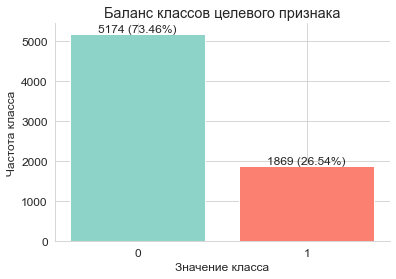

In [5]:
def cls_balance(df, row):
    '''
    Displays target class balance using Pyplot bar plot.
    '''
    green = (0.5529411764705883, 0.8274509803921568, 0.7803921568627451)
    red = (0.984313725490196, 0.5019607843137255, 0.4470588235294118)

    bal = df.groupby(row).agg({row: 'count'})
    bars = plt.bar(range(2), bal[row], color=[green, red])

    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x()+bar.get_width() / 2, h, str(h)+' (%.2f%%)' %
                 (h/len(df)*100), ha='center', va='bottom')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks([0, 1])
    plt.title('Баланс классов целевого признака')
    plt.xlabel('Значение класса')
    plt.ylabel('Частота класса')
    plt.show()
    
    
cls_balance(df, 'churn')

* Существующих клиентов в 3 раза больше, чем отключившихся.

## Расширенный анализ

### Сравнение распределения величин ежемесячных платежей всех клиентов и тех, кто ушёл

Для каждой группы посчитаем статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Построим гистограммы распределений.

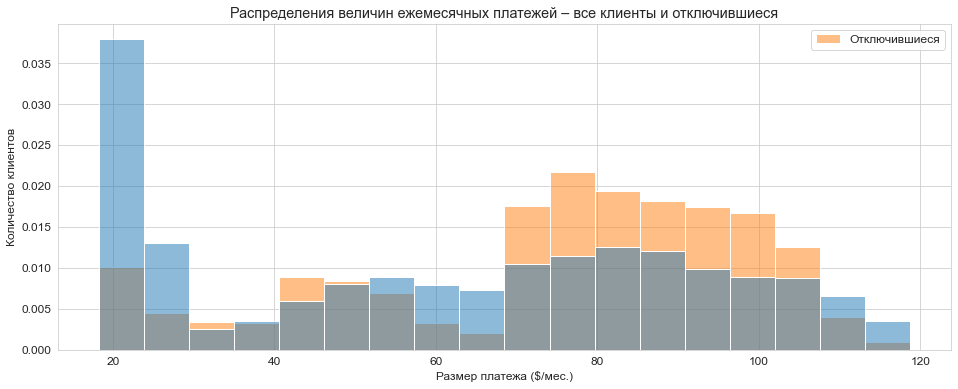

Статистики:


,минимум,среднее,максимум,25%-квартиль,медиана,75%-квартиль
Все клиенты,18.25,64.762,118.75,35.50,70.35,89.85
Отключившиеся,18.85,74.441,118.35,56.15,79.65,94.20


In [6]:
# Формирование графика
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='monthlycharges', hue='churn', stat='density', common_norm=False)

# Подписи
plt.legend(['Отключившиеся'])
plt.title('Распределения величин ежемесячных платежей – все клиенты и отключившиеся')
plt.xlabel('Размер платежа ($/мес.)')
plt.ylabel('Количество клиентов')
plt.show()

# Выборка клиентов
subset = ['min', 'mean', 'max', '25%', '50%', '75%']
all_clients = df.monthlycharges.describe()[subset]
churn_clients = df.query('churn == 1').monthlycharges.describe()[subset]

# Упаковка в датафрейм
all_df = pd.DataFrame(all_clients).T
churn_df = pd.DataFrame(churn_clients).T
pivot = pd.concat([all_df, churn_df])

# Подписи
pivot.columns = ['минимум', 'среднее', 'максимум', '25%-квартиль', 'медиана', '75%-квартиль']
pivot.index = ['Все клиенты', 'Отключившиеся']

# Вывод
print('Статистики:')
display(pivot)

**Вывод**

- Несколько мод на гистограмме соответствуют трём группам клиентов по размеру платежа (низкий, средний, высокий). Потенциально, на основе этого можно выделить еще один признак, но мы предоставим модели возможность работать с сырыми данными.

Распределения в целом похожи, однако среди отключившихся:

- Меньше клиентов с минимальным размером платежа;
- В среднем ежемесячный платеж выше на $10.

### Сравнение поведения всех клиентов и тех, кто ушёл

Для каждой группы построим два графика, изображающих:
* долю пользователей телефонной связи;
* долю интернет-пользователей.

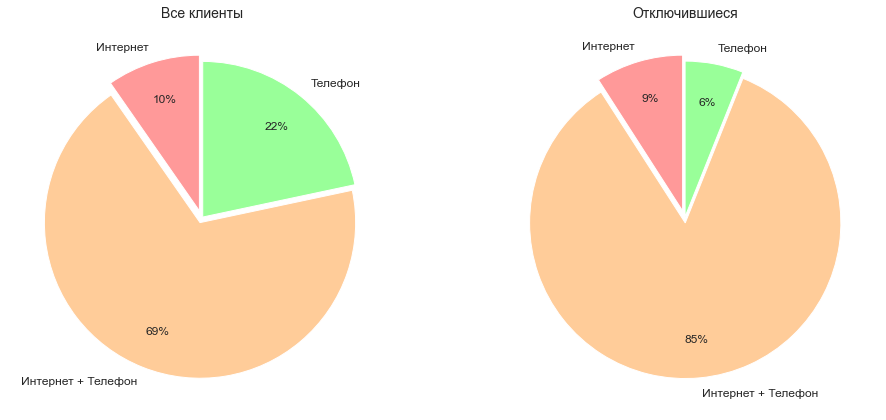

In [7]:
# Фигура
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Оформление
labels = ['Интернет', 'Интернет + Телефон', 'Телефон']
title = ['Все клиенты', 'Отключившиеся']
explode = (0.05, 0.03, 0.01)
colors = ['#ff9999', '#ffcc99', '#99ff99']

# Формирование графиков
for idx, data in enumerate([df, df.query('churn == 1')]):

    internet = data.query('internet == 1 and phone == 0').shape[0]
    both = data.query('internet == 1 and phone == 1').shape[0]
    phone = data.query('phone == 1 and internet == 0').shape[0]

    sizes = (internet, both, phone)

    ax[idx].set_title(title[idx], fontsize=14)

    ax[idx].pie(sizes, colors=colors, explode=explode, labels=labels,
                autopct='%1.f%%', startangle=90, pctdistance=0.75)

# Вывод
plt.tight_layout()
plt.show()

**Вывод**

Среди всех клиентов:
* у 10% подключена только услуга Интернет;
* у 22% подключена только услуга телефонии;
* у 69% подключены обе услуги.

Среди отключившихся клиентов:
* у 9% была подключена только услуга Интернет
* у 6% была подключена только услуга телефонии;
* у 85% были подключены обе услуги.
    
Таким образом:
- чаще всего отключались клиенты, у которых были подключены обе услуги;
- реже всего отключались клиенты использующие только услугу телефонии.

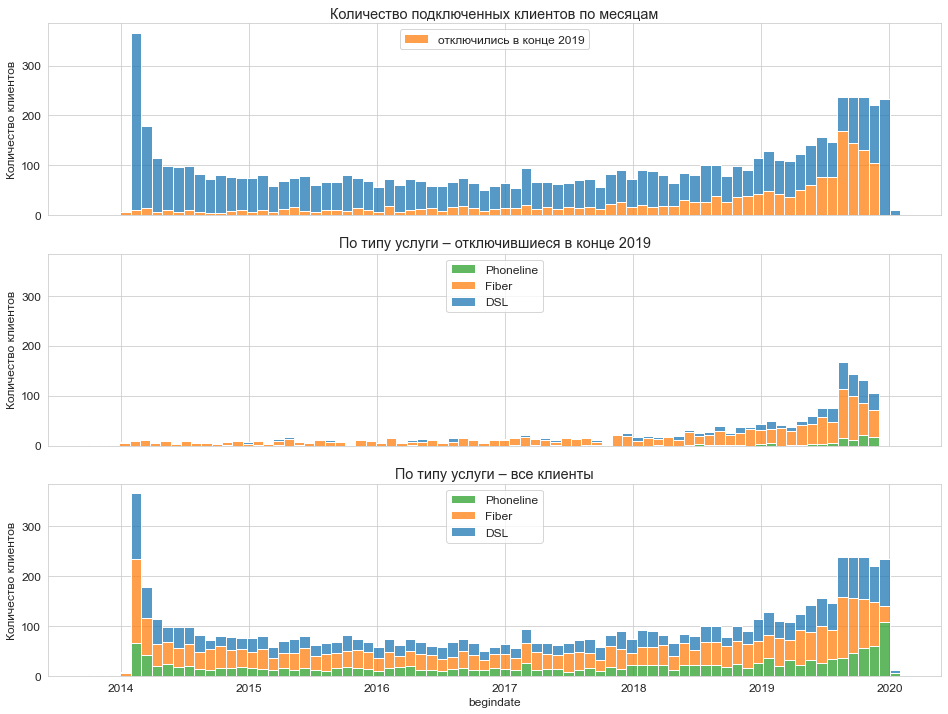

In [8]:
# Дату в datetime
df.begindate = pd.to_datetime(df.begindate)

# Фигура
bins = 77
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,
                                    figsize=(16, 12), sharey=True)
# AX1
sns.histplot(data=df, x='begindate', hue='churn',
             bins=bins, multiple='stack', ax=ax1)
# Оформление
ax1.legend(['отключились в конце 2019'], loc='upper center')
ax1.set_title('Количество подключенных клиентов по месяцам')
ax1.set_ylabel('Количество клиентов')

# AX2
sns.histplot(data=df[df.churn == 1], x='begindate', hue='internetservice',
             bins=bins, multiple='stack', ax=ax2)
# Оформление
ax2.legend(['Phoneline', 'Fiber', 'DSL'], loc='upper center')
ax2.set_title('По типу услуги – отключившиеся в конце 2019')
ax2.set_ylabel('Количество клиентов')
ax2.set_xlabel('Месяц подключения')

# AX3
sns.histplot(data=df, x='begindate', hue='internetservice',
             bins=bins, multiple='stack', ax=ax3)
# Оформление
ax3.legend(['Phoneline', 'Fiber', 'DSL'], loc='upper center')
ax3.set_title('По типу услуги – все клиенты')
ax3.set_ylabel('Количество клиентов')

plt.show()

**Вывод**

* В последние 5 месяцев число подключаемых в месяц абонентов увеличилось примерно вдвое;
* Среди отключившихся 40% были абонентами сроком от 1 до 4 месяцев;

## Матрица корреляции признаков

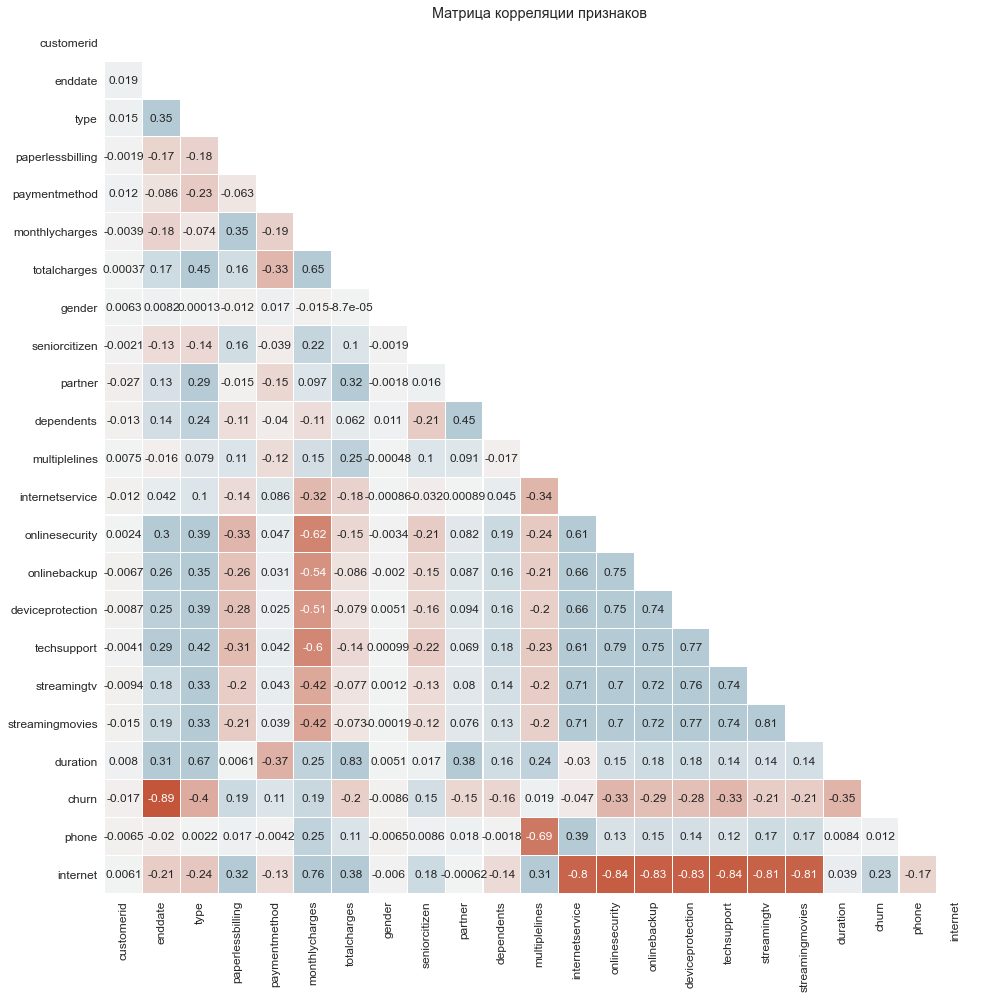

In [9]:
# Сделаем копию данных
df_corr = df.copy()

# Найдём все категориальные признаки и кодируем их по порядку
categorical = df_corr.select_dtypes(include=['object']).columns.tolist()
for cat in categorical:
    df_corr[cat] = df_corr[cat].astype('category').cat.codes

# Построим матрицу корреляции
corr = df_corr.corr()

# Сгенерируем маску для верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=bool))

# Добавим кастомную цветовую схему
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Выведем тепловую карту с маской и симметричными ячейками
plt.figure(figsize=(16,16))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.1, cbar=False, annot=True)

plt.title('Матрица корреляции признаков')
plt.show()

Высокая обратная корреляция:
* `churn` и `enddate`, о чем есть предупреждение в проекте;
* `phone` и `multiplelines` – не будем использовать сгенерированный признак в обучении;
* `internet` и доп. услуги – не будем использовать сгенерированный признак в обучении;

## Подготовка признаков

In [10]:
# Целевой признак
target = 'churn'

# Признаки, которые не будут использованы в обучении
drop = ['customerid', 'begindate', 'enddate', 'churn', 'internet', 'phone']

# One-Hot Encoding
X = pd.get_dummies(df.drop(drop, axis=1), drop_first=True)
y = df[target]

# Разобъем данные 4к1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RS)

## Быстрое сравнение моделей

  0%|          | 0/5 [00:00<?, ?it/s]

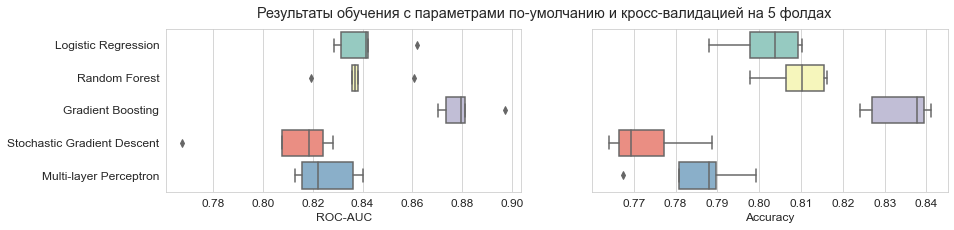

,Обучение (сек),Предсказание (сек),Среднее ROC-AUC на валидации,Среднее Accuracy на валидации
Модель,,,,
Gradient Boosting,1.092,0.026,0.880,0.834
Logistic Regression,0.575,0.016,0.841,0.802
Random Forest,1.111,0.125,0.838,0.809
Multi-layer Perceptron,6.916,0.013,0.825,0.785
Stochastic Gradient Descent,0.103,0.011,0.809,0.773
Baseline,0.000,0.000,0.500,0.734


In [11]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=RS)),
    ('Random Forest', RandomForestClassifier(random_state=RS)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=RS)),
    ('Stochastic Gradient Descent', SGDClassifier(random_state=RS)),
    ('Multi-layer Perceptron', MLPClassifier(hidden_layer_sizes=(10, 5), random_state=RS)),
]

scoring = ('roc_auc', 'accuracy')
results = pd.DataFrame()
base_data = {'fit_time': [0], 'score_time': [0],
             'test_roc_auc': [0.5], 'test_accuracy': [0.734]}
baseline = pd.DataFrame(index=['Baseline'], data=base_data)

# Эвалюация
for name, model in notebook.tqdm(models):

    pipe = Pipeline([('scaler', StandardScaler()), ('clf', model)])
    cval = cross_validate(pipe, X_train, y_train, scoring=scoring, n_jobs=-1)
    cval.update(model=name)

    # Сохраним результат
    results = pd.concat([results, pd.DataFrame(cval)])

# Фигура
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3), sharey=True)

# Графики
sns.boxplot(data=results, y='model', x='test_roc_auc', palette='Set3', ax=ax1)
sns.boxplot(data=results, y='model', x='test_accuracy', palette='Set3', ax=ax2)

# Подписи
ax1.set_xlabel('ROC-AUC'), ax1.set_ylabel('')
ax2.set_xlabel('Accuracy'), ax2.set_ylabel('')
plt.suptitle(
    'Результаты обучения с параметрами по-умолчанию и кросс-валидацией на 5 фолдах')
plt.show()

# Результаты таблицей
results = results.groupby('model').mean().sort_values(
    by='test_roc_auc', ascending=False)
results = pd.concat([results, baseline])
results.index.name = 'Модель'
results.columns = ['Обучение (сек)', 'Предсказание (сек)',
                   'Среднее ROC-AUC на валидации', 'Среднее Accuracy на валидации']
display(results)

* C большим отрывом по качеству лидирует `Gradient Boosting`.
* В Многослойном Перцептроне использована архитектура слоев, подобранная на эксперименте с `Keras`.

### Матрица ошибок

Посмотрим на чём модель ошибается.

Модель GradientBoostingClassifier(random_state=42)
ROC-AUC оценка на тесте: 0.906
Accuracy оценка на тесте: 0.852 (+0.118)
Precision (точность): 0.787
Recall (полнота): 0.603


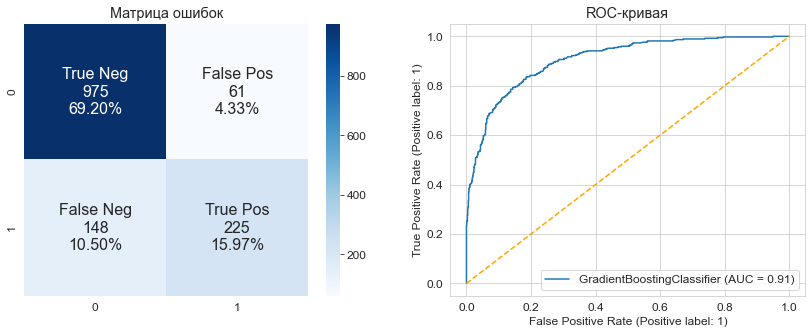

In [12]:
def cf_matrix(true, prediction, ax):
    '''
    Custom interface for the Confusion Matrix output.
    '''
    cf_matrix = confusion_matrix(true, prediction)

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, fmt='', cmap='Blues', ax=ax,
                annot=labels, annot_kws={'size': 16})

    ax.set_title('Матрица ошибок')


def score_output(model, fit=True):
    
    if fit:
        model.fit(X_train, y_train)
    predict = model.predict(X_test)
    predict_proba = model.predict_proba(X_test)[:, 1]

    # Графики
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    cf_matrix(y_test, predict, ax=ax1)
    plot_roc_curve(model, X_test, y_test, ax=ax2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='orange')
    ax2.set_title('ROC-кривая')
    
    # Accuracy
    acc_score = accuracy_score(y_test, predict)
    acc_basis = 0.734

    # Текстовый вывод
    print('Модель', model)
    print('ROC-AUC оценка на тесте: %.3f' % roc_auc_score(y_test, predict_proba))
    print('Accuracy оценка на тесте: %.3f (+%.3f)' % (acc_score, acc_score-acc_basis))
    print('Precision (точность): %.3f' % precision_score(y_test, predict))
    print('Recall (полнота): %.3f' % recall_score(y_test, predict))
    
    
score_output(models[2][1])

> Ошибка первого рода — ситуация, когда отвергнута верная нулевая гипотеза (англ. type I false positive, ошибочное отвержение);
> Ошибка второго рода — ситуация, когда принята неверная нулевая гипотеза (англ. type II false negative, ошибочное принятие).

* `Accuracy` предсказания: 85.2%, на 11.8% выше базисной линии;

> `Accuracy` и `ROC-AUC` – отличные метрики, но нужно помнить, что это лишь обобщённые характеристики. В реальной практике бизнесу часто важно знать детали самой ошибки, т.е. из каких ошибок/успехов она складывается. В этом случае очень кстати будут меры **полноты** и **точности**. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в боевое использование, будет сравнение стоимости создания и поддержки модели со стоимостью "оставить всё как есть".

 Рассмотрим **точность** и **полноту**:
* `Точность`: из предсказанных, только 78.7% клиентов склонны к оттоку;
* `Полнота`: модель может распознать 60.3% клиентов из общего числа тех, кто уйдёт.

### Оценка важности признаков

Оценим важность признаков методом `Permutation Importance`, на основе модели `Gradient Boosting`.

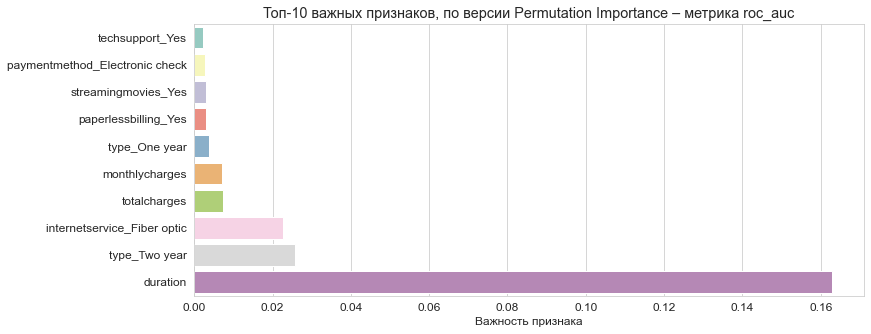

In [13]:
def permutation_plot(clf, X, y, scoring, random_state, length):
    # Модель
    clf = clf.fit(X, y)
    
    # Оценка важности
    perm = permutation_importance(
        clf, X, y, scoring=scoring, random_state=random_state)
    sorted_idx = perm.importances_mean.argsort()[-length:]
    
    # График
    plt.figure(figsize=(12, length/2))
    sns.barplot(x=perm.importances_mean[sorted_idx],
                y=X.columns[sorted_idx], palette='Set3', orient='h')

    # Подписи и вывод
    plt.title('Топ-%s важных признаков, по версии Permutation Importance – метрика %s' % (length, scoring))
    plt.xlabel('Важность признака')
    plt.show()


permutation_plot(models[2][1], X, y, scoring='roc_auc', random_state=RS, length=10)

* Признаки с высокой вариативностью или высоким вкладом попадают в топ. График показывает насколько высока цена перемешивания;
* Признак `duration` объясняет большую часть дисперсии в данных;


* `ROC-AUC` не поднимается выше 0.84 без использования признака `duration`, пример:

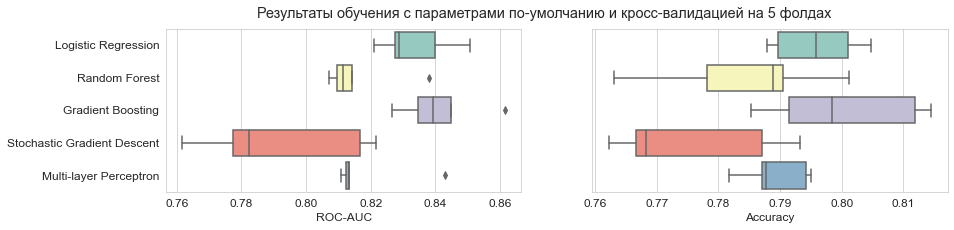

## CatBoost

In [14]:
catboost = CatBoostClassifier(
    iterations=1100,
    learning_rate=0.1,
    depth=4,
    verbose=200,
    loss_function='CrossEntropy',
    eval_metric='AUC',
    random_state=RS
)
catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test)
)
print('Модель обучена: %s' % catboost.is_fitted())
print('Параметры: %s' % catboost.get_params())

0:	test: 0.8230356	best: 0.8230356 (0)	total: 60.1ms	remaining: 1m 6s
200:	test: 0.9250611	best: 0.9250611 (200)	total: 600ms	remaining: 2.68s
400:	test: 0.9390339	best: 0.9391944 (396)	total: 1.25s	remaining: 2.18s
600:	test: 0.9434694	best: 0.9438783 (549)	total: 1.85s	remaining: 1.54s
800:	test: 0.9472088	best: 0.9472657 (799)	total: 2.38s	remaining: 890ms
1000:	test: 0.9477147	best: 0.9480343 (966)	total: 2.96s	remaining: 293ms
1099:	test: 0.9475517	best: 0.9480343 (966)	total: 3.27s	remaining: 0us

bestTest = 0.9480343039
bestIteration = 966

Shrink model to first 967 iterations.
Модель обучена: True
Параметры: {'iterations': 1100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'CrossEntropy', 'verbose': 200, 'eval_metric': 'AUC', 'random_state': 42}


Модель <catboost.core.CatBoostClassifier object at 0x18266cd30>
ROC-AUC оценка на тесте: 0.948
Accuracy оценка на тесте: 0.897 (+0.163)
Precision (точность): 0.875
Recall (полнота): 0.713


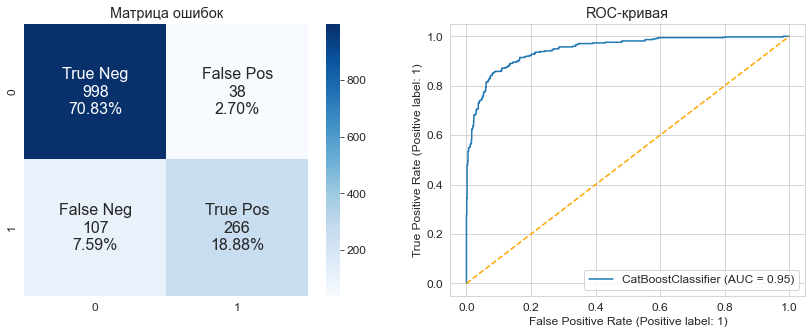

In [15]:
score_output(catboost, fit=False)

* `Accuracy` предсказания: 89.7%, на 16.3% выше базисной линии;
 

* `Точность`: из предсказанных, только 87.5% клиентов склонны к оттоку;
* `Полнота`: модель может распознать 71.3% клиентов из общего числа тех, кто уйдёт.

### Второй метод оценки важности признаков

Оценим важность признаков методом `SHAP`, на основе модели `CatBoost Classifier`.

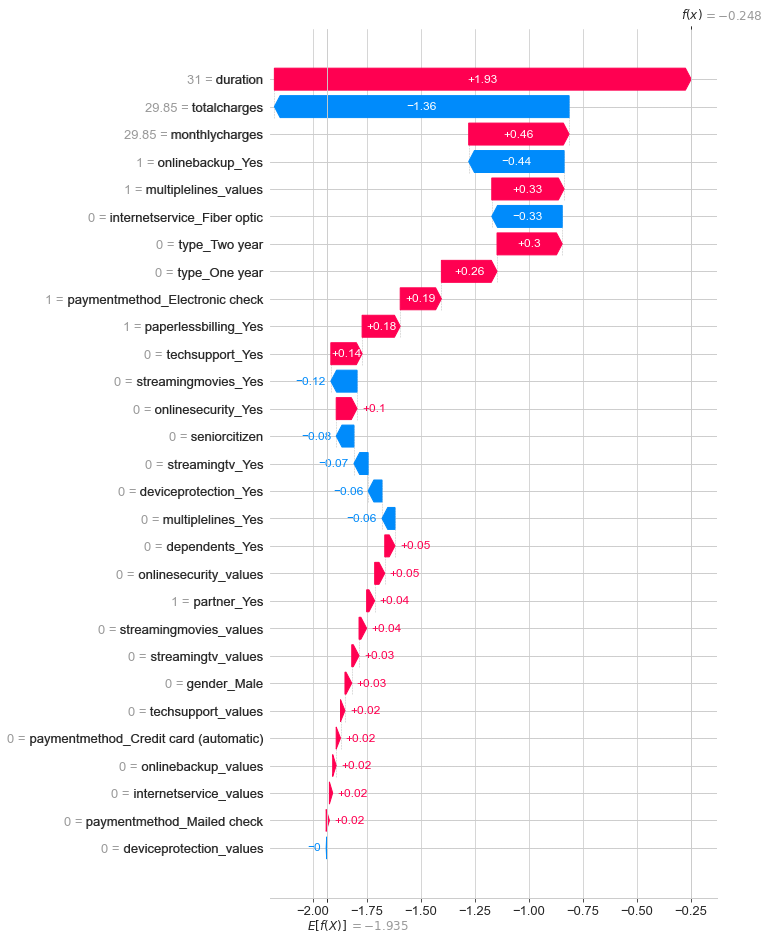

In [16]:
# Объясним предсказания с помощью SHAP
explainer = shap.Explainer(catboost)
shap_values = explainer(X)

# Визуализируем объяснение предсказания
shap.plots.waterfall(shap_values[0], max_display=30)

* SHAP позволяет пост-фактум интерпретировать важность того или иного признака;
* Как и с `Permutation Importance`, дан анализ на основе всего датасета;
* Основной вклад делает признак `duration`, как и в предыдущем анализе.

Удаление лишних признаков поможет сэкономить время на загрузке и обработке данных (ETL), и может положительно отразиться на времени работы алгоритма.

Эксперимент с последовательным удалением признаков показал, что задачу можно решить двумя путями с разным уровнем точности. В первом случае задача решается на одном только `duration`, во втором на сочетании **размера месячного платежа** и **типе услуг**.

### Предсказание без использования `duration`

Модель <catboost.core.CatBoostClassifier object at 0x183a2c340>
ROC-AUC оценка на тесте: 0.867
Accuracy оценка на тесте: 0.813 (+0.079)
Precision (точность): 0.690
Recall (полнота): 0.536


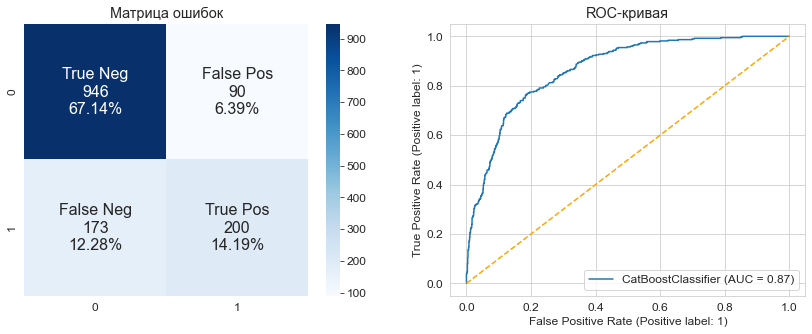

In [17]:
catboost = CatBoostClassifier(
    iterations=65,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    loss_function='CrossEntropy',
    eval_metric='AUC',
    random_state=RS
)

catboost.fit(
    X_train.drop('duration', axis=1), y_train,
    eval_set=(X_test.drop('duration', axis=1), y_test)
)

score_output(catboost, fit=False)

* `Accuracy` предсказания: 81.3%, на 7.9% выше базисной линии;
 

* `Точность`: из предсказанных, только 69% клиентов склонны к оттоку;
* `Полнота`: модель может распознать 53.6% клиентов из общего числа тех, кто уйдёт.

### Предсказание на одном `duration`

```python
score_output(models[1][1])

Модель RandomForestClassifier
ROC-AUC оценка на тесте: 0.932
Accuracy оценка на тесте: 0.899
Precision (точность): 0.911
Recall (полнота): 0.684
```

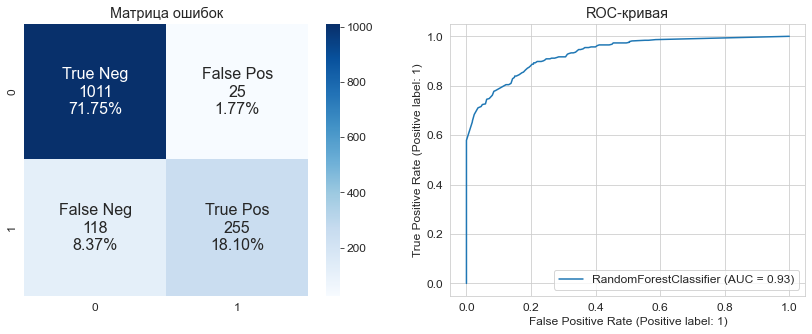

## Вывод

```python
ROC-AUC оценка на тесте: 0.948
Accuracy оценка на тесте: 0.897 (+0.163)
Precision (точность): 0.875
Recall (полнота): 0.713
```

* Лучше всего на данных отработал алгоритм Градиентного Бустинга. Его продвинутая реализация – `CatBoost`, дала отличный результат вкупе с минимальным вложением времени в тонкую настройку.


* Планируемый к использованию `Keras` был заменён на более легковесный `MLPClassifier`. В целом, Нейронные сети показали средний результат. Не удалось подобрать архитектуру, которая бы учитывала полезный сигнал из `duration` также хорошо как это делает `CatBoost`.


* Похоже, что данные сформированы синтетически. На это наталкивает форма распределения, а также тот факт, что абоненты отключались только 4 месяца с октября 2019-го по январь 2020-го. Можно предположить, что произошло некое **событие** на рынке исследуемого оператора.


* Несмотря на то, что модель хорошо пресказывает это **событие**, и позволяет выделить клиентов склонных к оттоку, общая польза от её использования остаётся под вопросом, так как **событие** может больше не повториться. Отток носит не случайный и распределённый во времени характер, а сконцентрирован в нескольких месяцах.

Если не учитывать сигнал признака `duration`, то есть абстрагироваться от дат, то мы получим следующие метрики:

```python
ROC-AUC оценка на тесте: 0.867
Accuracy оценка на тесте: 0.813 (+0.079)
Precision (точность): 0.690
Recall (полнота): 0.536
```

## Отчёт по решению

Существенных сложностей не возникло. Опорные пункты плана были выполнены, добавились новые. Оказалось, что имеет значение как именно рассчитывать признак `duration`: в количестве дней или месяцов. Только в формате количества дней удалось извлечь полезный сигнал, в противном случае метрика `ROC-AUC` не поднималась выше уровня 0.865. Я объясняю это увеличенным расстоянием между значениями признака.

Признаки `phone` и `internet`, выделение которых казалось хорошей идеей в начале, только ухудшили качество из-за высокой корреляции со существующими признаками.

Было предположение, что наилучший результат даст Нейронная сеть. Был проведён эксперимент с фреймворком `Keras`, который впоследствии был заменён на `MLP Classifier` и оставлен в прооекте для иллюстрации. Сделан вывод, что `Keras` излишне тяжеловесен и неэффективен в рамках поставленной задачи на небольшом объёме данных.

Самую высокую метрику и быстрый результат продемонстрировал алгоритм `CatBoost`. С его использованием получено пресказание с `ROC-AUC` на уровне 0.946 и `Accuracy` на уровне 0.892. Лучший результат принадлежит ему в том числе без использования признака `duration`.

- [x] Проведена подготовка, импорт и анализ данных;
- [x] Проведена предобработка, заполнены пропуски образовавшиеся после слияния таблиц и добавлены новые признаки:
    * `duration`: как долго клиент пользуется услугой;
    * `churn`: ушёл ли клиент;
    * `phone`: пользуется ли телефоном (не использовался для предсказания);
    * `internet`: пользуется ли интернетом (не использовался для предсказания).
- [x] Проведен анализ поведения отключившихся клиентов, изучена проблематика, выполнена визуализация;
- [x] Категориальные переменные закодированы методом `One-Hot Encoding`;
- [x] Данные разбиты на обучающую и валидационную выборку в соотношении 4к1;
- [x] Проведен сравнительный анализ нескольких классификаторов:
    * `Logistic Regression`;
    * `Random Forest Classifier`;
    * `Gradient Boosting Classifier`;
    * `SGD Classifier`;
    * `MLP Classifier`;
    * `CatBoost Classifier`.
- [x] Проанализировано качество предсказания с помощью матрицы ошибок; 
- [x] Методами `Permutation Importance` и `SHAP` оценена важность признаков;
- [x] Сделан вывод по проекту, указаны замечания.